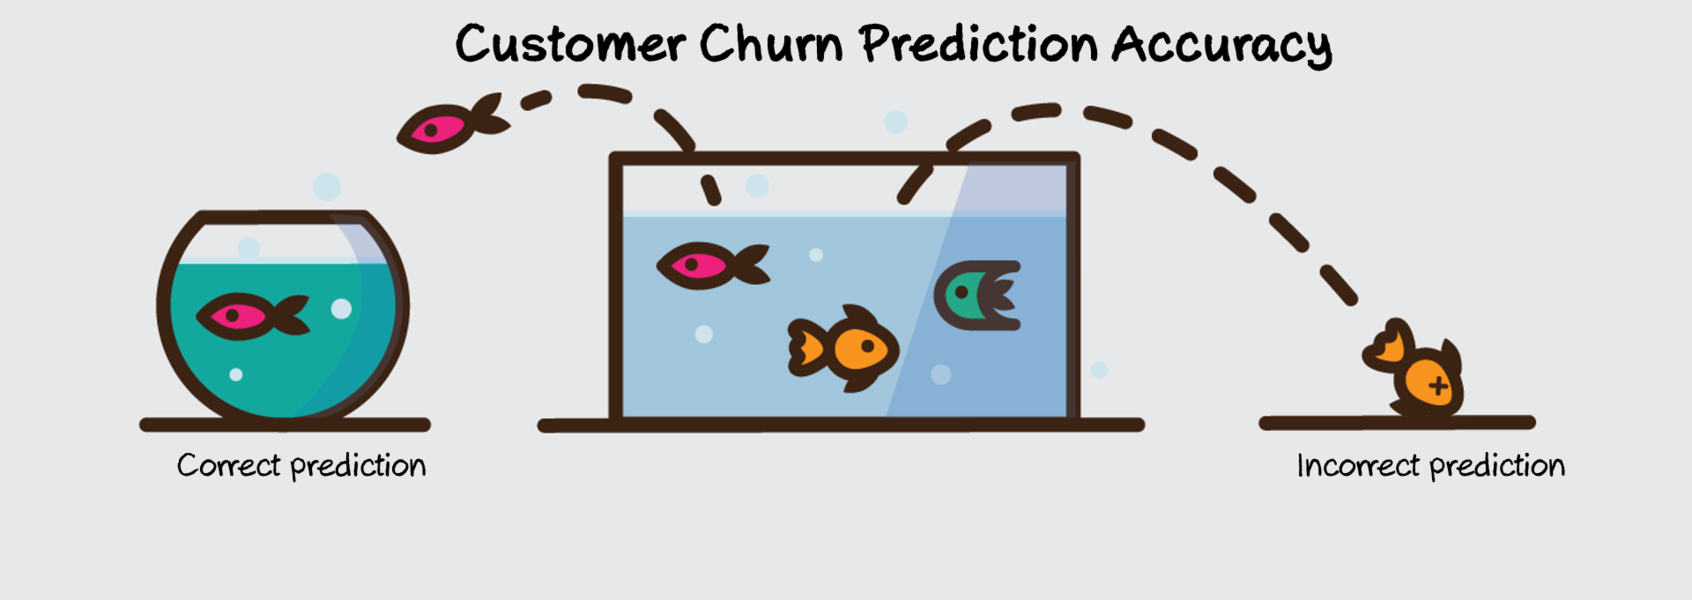

In [1]:
from IPython.display import Image
Image('churn.png')

# 1. Data preprocessing and exploration

## 1.1. Importing libraries and dataset

In [2]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [6]:
dataset.shape

(10000, 14)

In [7]:
dataset.columns.to_list()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [8]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 1.2. Statistical description

In [9]:
dataset.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace=True)

In [10]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [13]:
dataset.describe(include=['object']).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [14]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
dataset['Geography'].value_counts(normalize = False)

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## 1.3. Boxplot

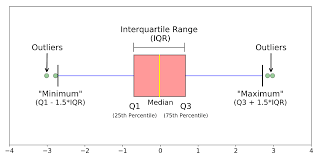

In [16]:
Image('boxplot.png')

<Axes: >

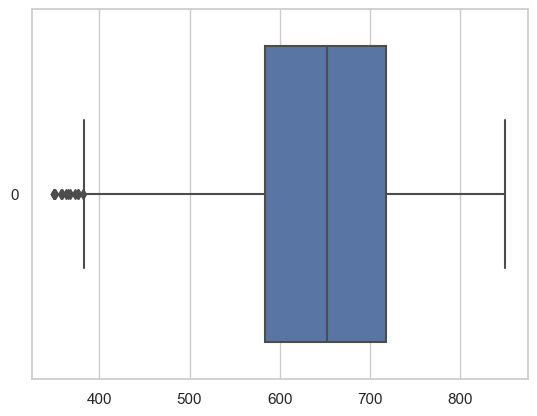

In [17]:
sns.set(style='whitegrid')
sns.boxplot(data = dataset['CreditScore'], orient = 'h')

In [18]:
IQR = dataset['CreditScore'].quantile(0.75)-dataset['CreditScore'].quantile(0.25)

In [19]:
IQR

134.0

In [20]:
Inf = dataset['CreditScore'].quantile(0.25)-1.5*IQR

In [21]:
Inf

383.0

In [22]:
dataset.loc[dataset['CreditScore']<Inf,'Age'].count()

15

In [23]:
dataset.loc[dataset['CreditScore']<Inf,:]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [24]:
dataset.loc[dataset['CreditScore']<Inf,'Exited'].mean()

1.0

In [25]:
Sup = dataset['CreditScore'].quantile(0.75)+1.5*IQR

In [26]:
Sup

919.0

In [27]:
my_list = ['CreditScore', 'Age']

In [28]:
my_list

['CreditScore', 'Age']

In [29]:
dataset[my_list].head()

,CreditScore,Age
0,619,42
1,608,41
2,502,42
3,699,39
4,850,43


<Axes: >

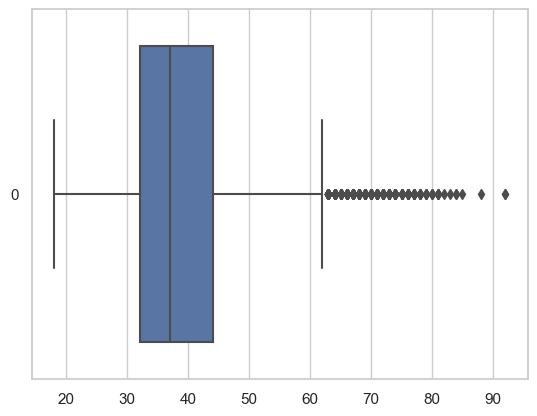

In [30]:
sns.boxplot(data = dataset['Age'], orient = 'h')

In [31]:
dataset.loc[dataset['Age']>70,'Exited'].mean()

0.08270676691729323

## 1.4. Scatter Plot

Text(0, 0.5, 'CreditScore')

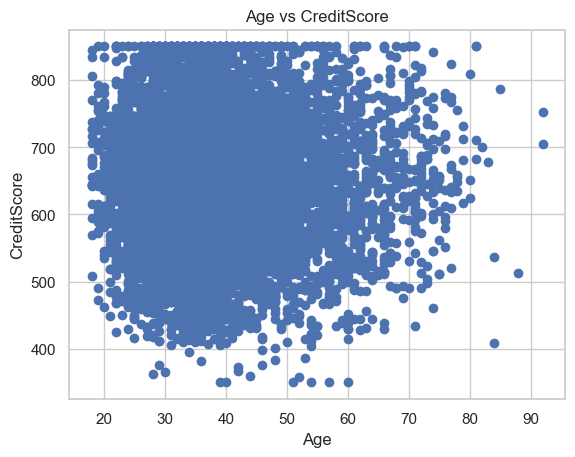

In [32]:
plt.scatter(x=dataset['Age'],y=dataset['CreditScore'])
plt.title('Age vs CreditScore')
plt.xlabel('Age')
plt.ylabel('CreditScore')

In [33]:
my_list_2 = ['CreditScore', 'EstimatedSalary', 'Age','Exited']

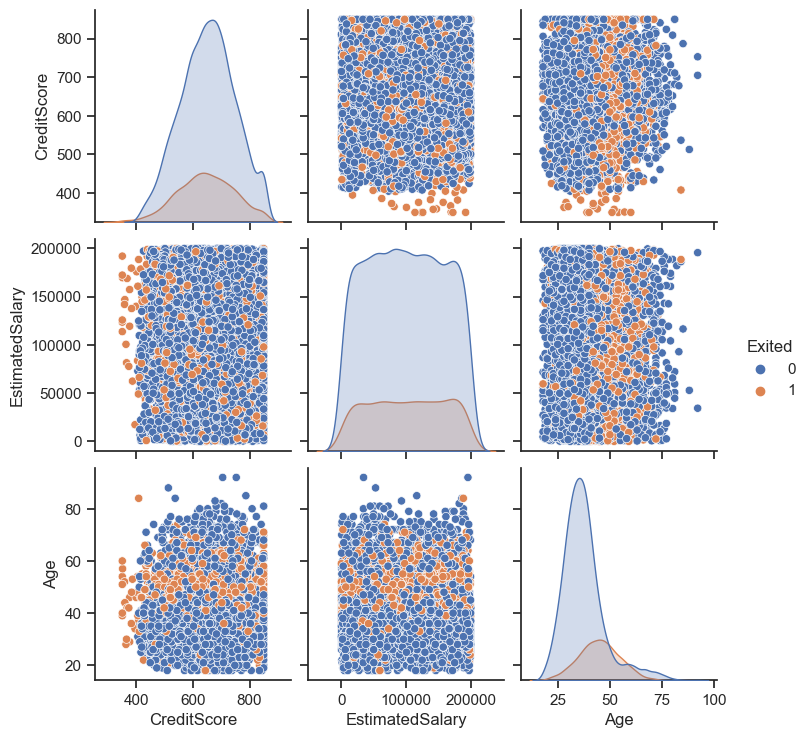

In [34]:
sns.set(style='ticks')
sns.pairplot(dataset[my_list_2],hue = 'Exited')

In [35]:
dataset[(dataset['Age']>45)&(dataset['Age']<55)]['Exited'].count()

1229

In [36]:
dataset.loc[(dataset['Age']>45)&(dataset['Age']<55),'Exited'].mean()

0.500406834825061

## 1.5. Input variables and target

In [37]:
dataset.shape

(10000, 11)

In [38]:
X = dataset.iloc[:,0:10]
y = dataset.iloc[:,10]

In [39]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [41]:
type(X)

pandas.core.frame.DataFrame

In [42]:
type(y)

pandas.core.series.Series

**Convert DataFrame to Numpy Array**

In [43]:
X = X.values
y = y.values

In [44]:
type(X)

numpy.ndarray

In [45]:
type(y)

numpy.ndarray

In [46]:
print(X[0:10,:])

[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]
 [645 'Spain' 'Male' 44 8 113755.78 2 1 0 149756.71]
 [822 'France' 'Male' 50 7 0.0 2 1 1 10062.8]
 [376 'Germany' 'Female' 29 4 115046.74 4 1 0 119346.88]
 [501 'France' 'Male' 44 4 142051.07 2 0 1 74940.5]
 [684 'France' 'Male' 27 2 134603.88 1 1 1 71725.73]]


## 1.6. Encoding categorical data

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [48]:
X[:,1] = label.fit_transform(X[:,1])

In [49]:
X[0:10,:]

array([[619, 0, 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [50]:
X[:,2] = label.fit_transform(X[:,2])

In [51]:
X[0:10,:]

array([[619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 2, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 2, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 2, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 0, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 1, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 0, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 0, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

**Dummy encoding**

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [53]:
X.shape

(10000, 10)

In [54]:
ct = ColumnTransformer([('Geography',OneHotEncoder(),[1])],remainder = 'passthrough')

In [55]:
X = ct.fit_transform(X)

In [56]:
X.shape

(10000, 12)

In [57]:
X[0:10,:]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [1.0, 0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [0.0, 1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [1.0, 0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [1.0, 0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [58]:
if X.shape[1] == 12:
    X = X[:,1:]

In [59]:
X.shape

(10000, 11)

In [60]:
X[0:10,:]

array([[0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [0.0, 1.0, 645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [0.0, 0.0, 822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [1.0, 0.0, 376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [0.0, 0.0, 501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [0.0, 0.0, 684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [61]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [62]:
features = ['Geo_Ger','Geo_Sp','CreditScore', 
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [63]:
features

['Geo_Ger',
 'Geo_Sp',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

## 1.7. Splitting dataset into train and test sets

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [65]:
X_test[0:5,:]

array([[1.0, 0.0, 597, 0, 35, 8, 131101.04, 1, 1, 1, 192852.67],
       [0.0, 0.0, 523, 0, 40, 2, 102967.41, 1, 1, 0, 128702.1],
       [0.0, 1.0, 706, 0, 42, 8, 95386.82, 1, 1, 1, 75732.25],
       [0.0, 0.0, 788, 1, 32, 4, 112079.58, 1, 0, 0, 89368.59],
       [1.0, 0.0, 706, 1, 38, 5, 163034.82, 2, 1, 1, 135662.17]],
      dtype=object)

In [66]:
X_train.shape

(8000, 11)

In [67]:
X_test.shape

(2000, 11)

In [68]:
y.mean()

0.2037

In [69]:
print(y_train.mean())
print(y_test.mean())

0.204
0.2025


## 1.8. Feature scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler

In [72]:
X_train[0,:]

array([0.0, 1.0, 667, 0, 34, 5, 0.0, 2, 1, 0, 163830.64], dtype=object)

In [73]:
X_train_sc[0,:]

array([-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
        0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
        1.10643166])

In [74]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

0.16958176236487257

In [75]:
scaler.inverse_transform(X_train_sc)

array([[0.0000000e+00, 1.0000000e+00, 6.6700000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.6383064e+05],
       [1.0000000e+00, 0.0000000e+00, 4.2700000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 5.7098000e+04],
       [0.0000000e+00, 0.0000000e+00, 5.3500000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.8563076e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.3800000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [0.0000000e+00, 1.0000000e+00, 5.9000000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [1.0000000e+00, 0.0000000e+00, 6.2300000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

# 2. k Nearest Neighbors

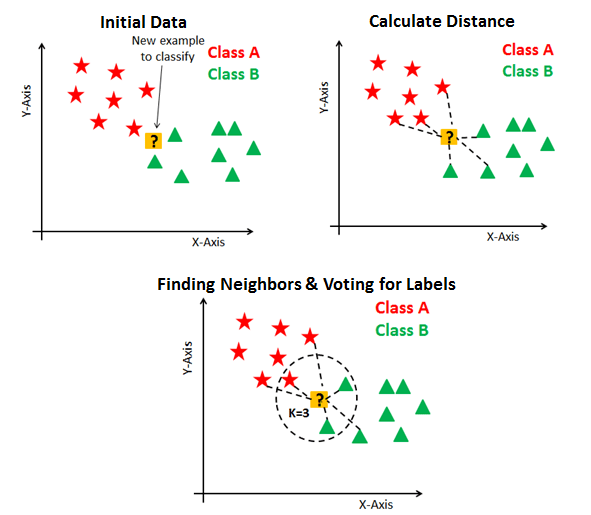

In [76]:
Image('knn.png')

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [78]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [79]:
y_pred_knn = knn.predict(X_test_sc)

In [80]:
for i in range(20):
    print(y_test[i], y_pred_knn[i])

0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
0 0
0 0


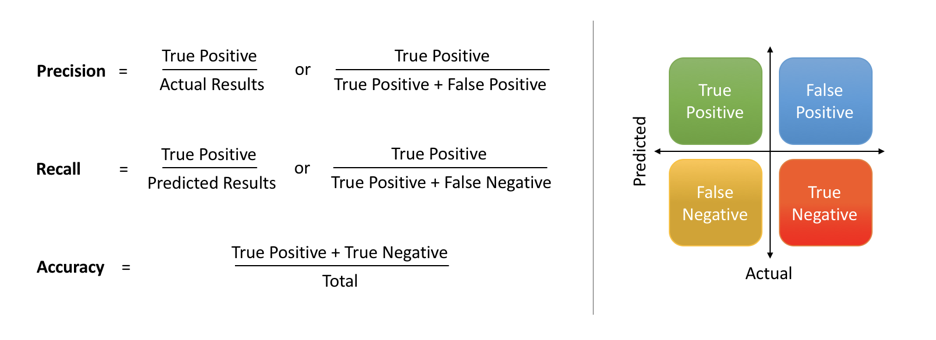

In [81]:
Image('metrics.png')

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[1486  109]
 [ 237  168]]
Accuracy knn 0.827


In [84]:
from sklearn.metrics import precision_score, recall_score

In [85]:
print('Recall knn', recall_score(y_test,y_pred_knn))
print('Precision knn', precision_score(y_test,y_pred_knn))

Recall knn 0.4148148148148148
Precision knn 0.6064981949458483


In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1595
           1       0.61      0.41      0.49       405

    accuracy                           0.83      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.81      0.83      0.81      2000



**Grid search**

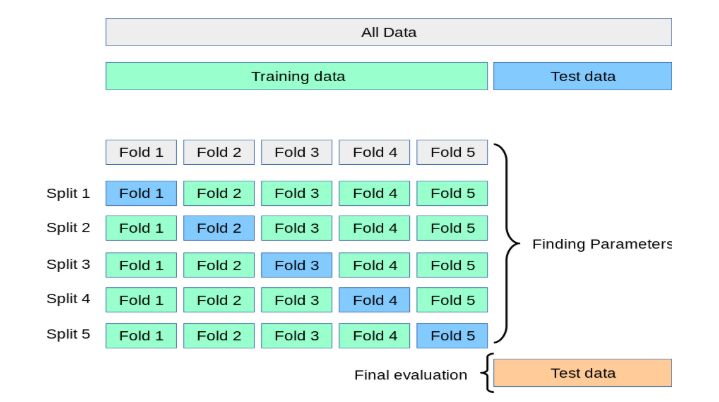

In [88]:
Image('grid.png')

In [89]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13,15]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 9}
0.8303750000000001


In [90]:
y_pred_knn_o = grille.predict(X_test_sc)

In [91]:
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(y_test,y_pred_knn_o))
print('Recall knn op', recall_score(y_test,y_pred_knn_o))
print('Precision knn op', precision_score(y_test,y_pred_knn_o))

Confusion matrix knn op 
 [[1516   79]
 [ 252  153]]
Accuracy knn op 0.8345
Recall knn op 0.37777777777777777
Precision knn op 0.6594827586206896


In [92]:
print(classification_report(y_test,y_pred_knn_o))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1595
           1       0.66      0.38      0.48       405

    accuracy                           0.83      2000
   macro avg       0.76      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000



# 3. Decision Tree

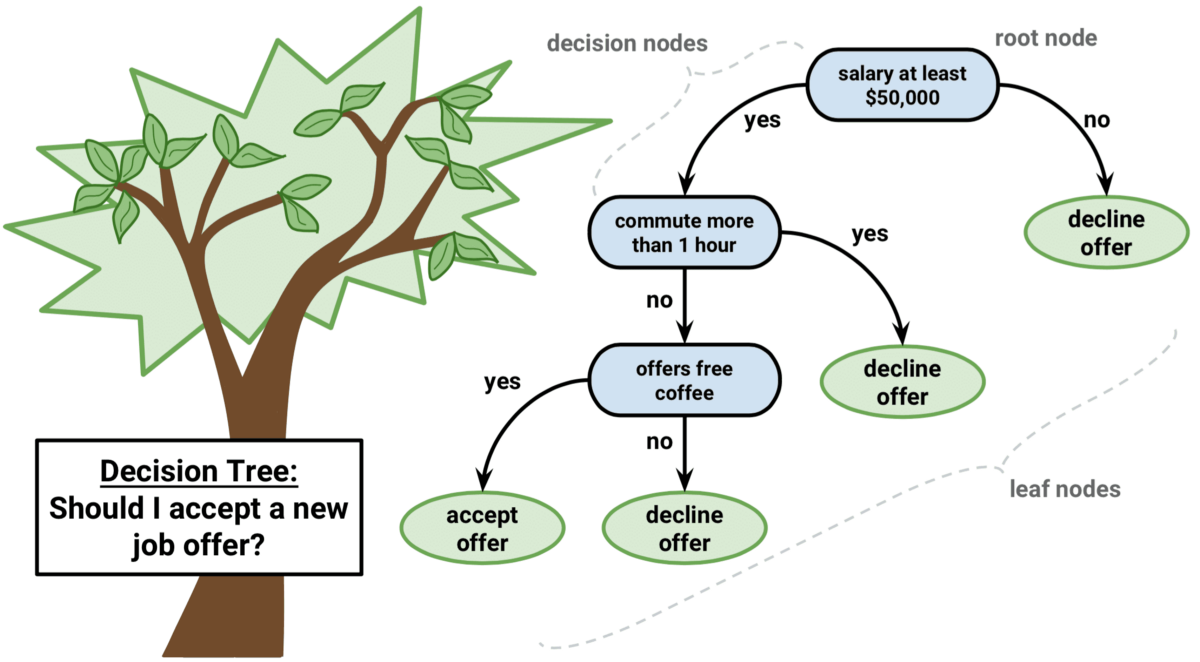

In [93]:
Image('decision.png')

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [95]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
y_pred_dt = dt.predict(X_test)

In [97]:
for i in range(20):
    print(y_test[i],y_pred_dt[i])

0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1
0 0
0 1
0 0
0 0
1 1
1 0
0 1
0 0
0 0
0 0


In [98]:
print('Confusion matrix dt \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy dt', accuracy_score(y_test,y_pred_dt))
print('Recall dt', recall_score(y_test,y_pred_dt))
print('Precision dt', precision_score(y_test,y_pred_dt))

Confusion matrix dt 
 [[1385  210]
 [ 172  233]]
Accuracy dt 0.809
Recall dt 0.5753086419753086
Precision dt 0.5259593679458239


In [99]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1595
           1       0.53      0.58      0.55       405

    accuracy                           0.81      2000
   macro avg       0.71      0.72      0.71      2000
weighted avg       0.82      0.81      0.81      2000



**Visualization**

In [100]:
!pip install graphviz

In [101]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [102]:
features

['Geo_Ger',
 'Geo_Sp',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [103]:
tree.export_graphviz(model,feature_names = features,\
                    out_file = 'dt_isi.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

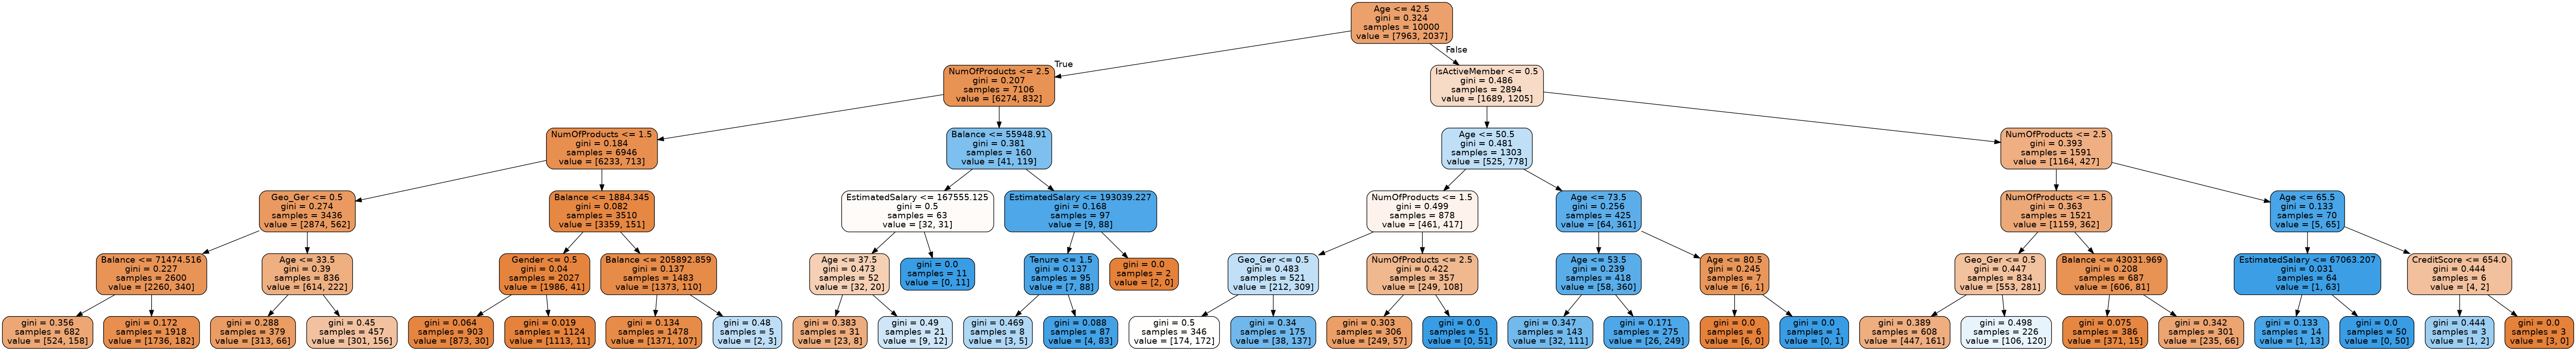

In [104]:
Image('dt-isi.png')

# 4. Random Forest

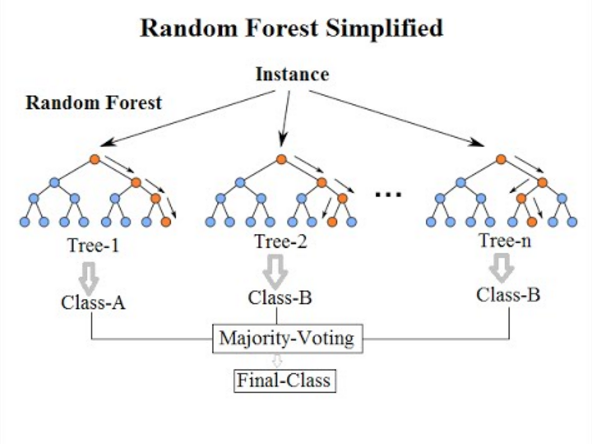

In [105]:
Image('random_forest.png')

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [107]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [108]:
y_pred_rf = rf.predict(X_test)

In [109]:
for i in range(20):
    print(y_test[i],y_pred_rf[i])

0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1
0 0
0 0
0 0
0 0
1 1
1 0
0 0
0 0
0 0
0 0


In [110]:
print('Confusion matrix rf \n', confusion_matrix(y_test,y_pred_rf))
print('Accuracy rf', accuracy_score(y_test,y_pred_rf))
print('Recall rf', recall_score(y_test,y_pred_rf))
print('Precision rf', precision_score(y_test,y_pred_rf))

Confusion matrix rf 
 [[1522   73]
 [ 196  209]]
Accuracy rf 0.8655
Recall rf 0.5160493827160494
Precision rf 0.7411347517730497


In [111]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.52      0.61       405

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



# 5. Features selection

In [112]:
importances = rf.feature_importances_

In [113]:
importances

array([0.02687439, 0.01417941, 0.14333767, 0.01852509, 0.23711006,
       0.0798977 , 0.14539313, 0.12942748, 0.01868651, 0.03818459,
       0.14838395])

In [114]:
print(features)

['Geo_Ger', 'Geo_Sp', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [115]:
sum(importances)

0.9999999999999999

In [116]:
sorted_idx = np.argsort(importances)

In [117]:
features_arr = np.asarray(features)

Text(0.5, 1.0, 'Variable importance')

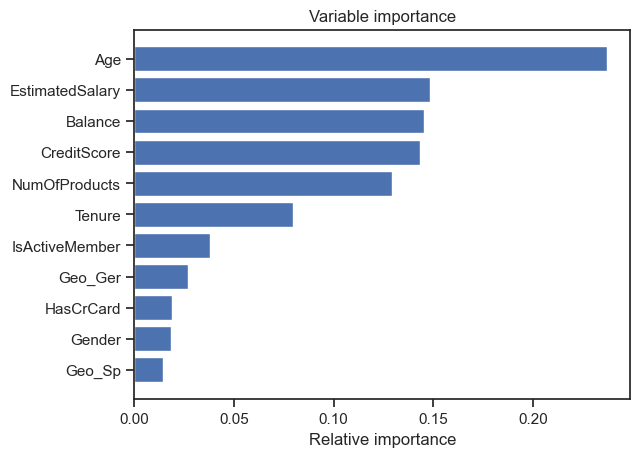

In [118]:
padding=np.arange(X_train_sc.size/len(X_train_sc))
plt.barh(padding,importances[sorted_idx],align='center')
plt.yticks(padding,features_arr[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')

# 6. Support vector Machine

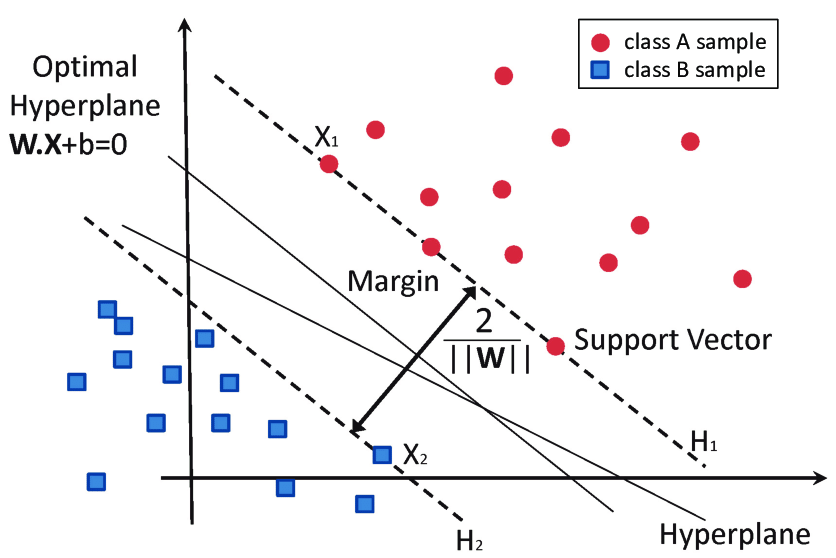

In [119]:
Image('linear_svm.png')

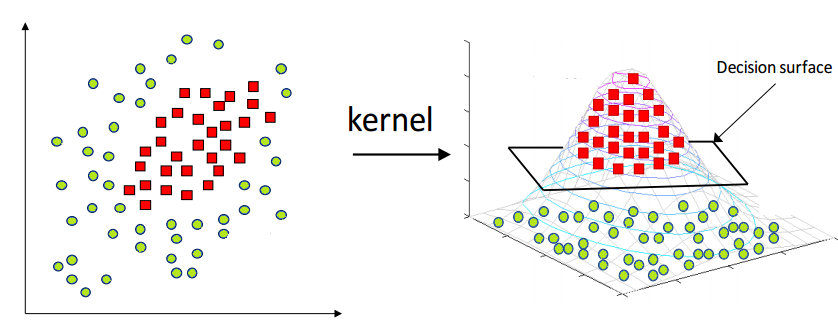

In [120]:
Image('kernel_svm.png')

In [121]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [122]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy linear SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_l)))
print('Precision linear SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_l)))
print('Recall linear SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_l)))

[[1595    0]
 [ 405    0]]
Accuracy linear SVM 0.797
Precision linear SVM 0.000
Recall linear SVM 0.000


In [123]:
print(classification_report(y_test,y_predictSVM_l))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



In [124]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)

SVC()

In [125]:
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM {0:.3f}'.format(accuracy_score(y_test,y_predictSVM_k)))
print('Precision rbf SVM {0:.3f}'.format(precision_score(y_test,y_predictSVM_k)))
print('Recall rbf SVM {0:.3f}'.format(recall_score(y_test,y_predictSVM_k)))

[[1547   48]
 [ 225  180]]
Accuracy rbf SVM 0.864
Precision rbf SVM 0.789
Recall rbf SVM 0.444


In [126]:
print(classification_report(y_test,y_predictSVM_k))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.79      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



# 7. Logistic Regression

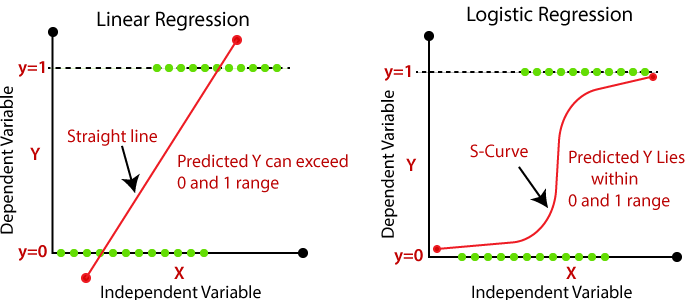

In [127]:
Image(filename='logistic.png')

In [128]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

LogisticRegression()

In [130]:
y_predictLR = LR.predict(X_test_sc)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(accuracy_score(y_test,y_predictLR)))
print('Precision Logistic Regression {0:.3f}'.format(precision_score(y_test,y_predictLR)))
print('Recall Logistic Regression {0:.3f}'.format(recall_score(y_test,y_predictLR)))

[[1526   69]
 [ 309   96]]
Accuracy Logistic Regression 0.811
Precision Logistic Regression 0.582
Recall Logistic Regression 0.237


In [131]:
print(classification_report(y_test,y_predictLR))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



# 8. Summary

| Algorithm       | Accuracy     |Recall | Precision |
| :------------- | -----------|-----------|-----------:|
|  Optimized kNN  | 0.834    | 0.377 | 0.659 |
| Decision Tree   | 0.804  | 0.572 | 0.514 |
| Random Forest | 0.865 | 0.523 | 0.736 |
| linear SVM   | 0.797  | 0.000 | 0.000 |
| kernel SVM   | 0.864  | 0.444 | 0.789 |
| Logistic Regression | 0.811 | 0.237 | 0.582 |

# 9. Receiver Operating Characteristic (ROC) Curve

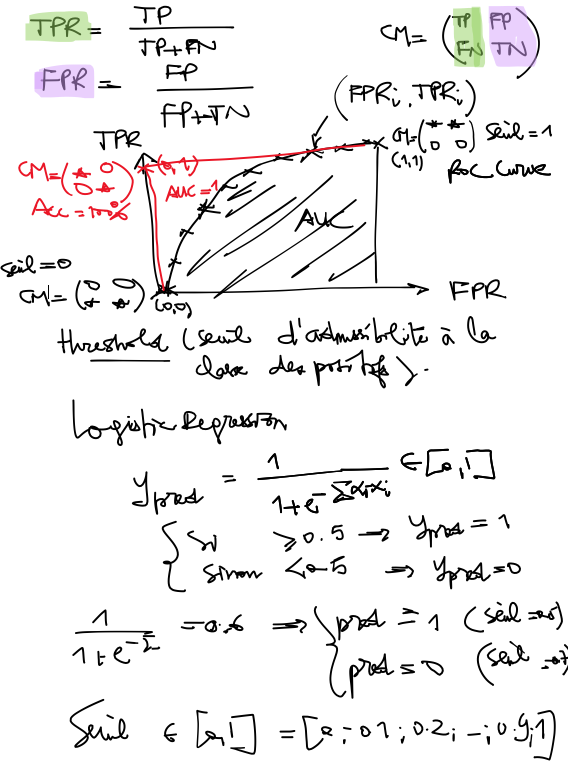

In [132]:
Image(filename='roc_curve.png')

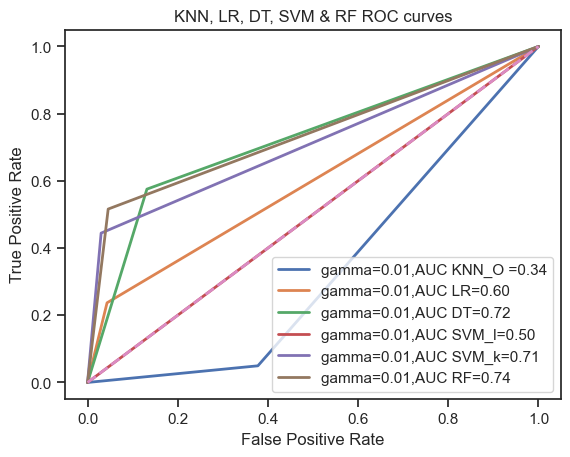

In [133]:
from sklearn import metrics
tpr,fpr,thr = metrics.roc_curve(y_test,y_pred_knn_o)
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_predictLR)
fpr3,tpr3,thr3 = metrics.roc_curve(y_test,y_pred_dt)
fpr4,tpr4,thr4 = metrics.roc_curve(y_test,y_predictSVM_l)
fpr5,tpr5,thr5 = metrics.roc_curve(y_test,y_predictSVM_k)
fpr6,tpr6,thr6 = metrics.roc_curve(y_test,y_pred_rf)
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
auc3 = metrics.auc(fpr3,tpr3)
auc4 = metrics.auc(fpr4,tpr4)
auc5 = metrics.auc(fpr5,tpr5)
auc6 = metrics.auc(fpr6,tpr6)
plt.plot(fpr,tpr,'-',lw=2,label='gamma=0.01,AUC KNN_O =%.2f'%auc)
plt.plot(fpr2,tpr2,'-',lw=2,label='gamma=0.01,AUC LR=%.2f'%auc2)
plt.plot(fpr3,tpr3,'-',lw=2,label='gamma=0.01,AUC DT=%.2f'%auc3)
plt.plot(fpr4,tpr4,'-',lw=2,label='gamma=0.01,AUC SVM_l=%.2f'%auc4)
plt.plot(fpr5,tpr5,'-',lw=2,label='gamma=0.01,AUC SVM_k=%.2f'%auc5)
plt.plot(fpr6,tpr6,'-',lw=2,label='gamma=0.01,AUC RF=%.2f'%auc6)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN, LR, DT, SVM & RF ROC curves')
plt.legend(loc='lower right')
plt.show()

**Random Forest est le meilleur algorithme**